<a href="https://colab.research.google.com/github/omartas/FoboGencHackathon/blob/master/13_03_2023_Siniflandirma_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BikeShare**

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
random_state = 1000 #random_state = 42

In [ ]:
df = pd.read_csv('/gdrive/My Drive/ML_and_DL_Learning/bikeshare.csv')

In [ ]:
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1


In [ ]:
df.isna().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
notbizday     0
weathersit    0
temp          0
hum           0
windspeed     0
dteday        0
cnt           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
df.shape

(17379, 13)

In [ ]:
overload = np.where(df['cnt']>500, 1, 0)

In [ ]:
pd.crosstab(overload, overload, normalize='all')*100

col_0,0,1
row_0,,
0,92.640543,0.000000
1,0.000000,7.359457


In [ ]:
df['overload'] = overload

df.drop('cnt', axis=1, inplace=True)

df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dteday', 'overload'],
      dtype='object')

In [ ]:
categorical = ['season','yr','mnth','hr','holiday','weekday','notbizday','weathersit']

In [ ]:
for col in categorical:
  df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   notbizday   17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  dteday      17379 non-null  object  
 12  overload    17379 non-null  int64   
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 817.0+ KB


In [ ]:
df.drop('dteday', axis=1, inplace=True)

In [ ]:
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday',
       'weathersit', 'temp', 'hum', 'windspeed', 'overload'],
      dtype='object')

In [ ]:
df.columns.difference(categorical)

Index(['hum', 'overload', 'temp', 'windspeed'], dtype='object')

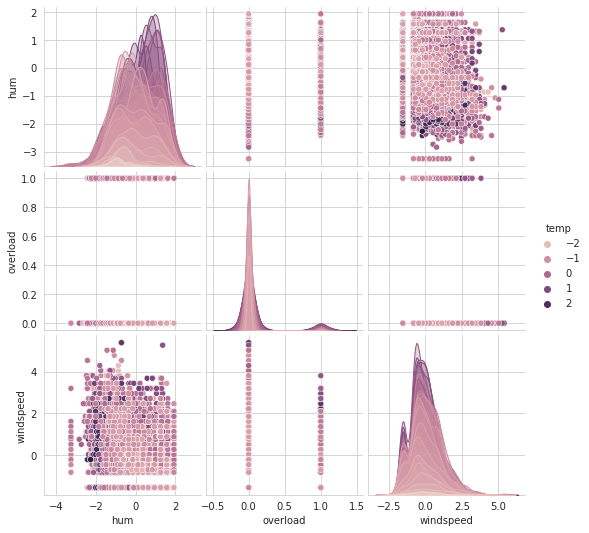

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(df[df.columns.difference(categorical)], hue='temp')

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.columns

Index(['temp', 'hum', 'windspeed', 'overload', 'season_2', 'season_3',
       'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'notbizday_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [ ]:
df.shape

(17379, 53)

In [ ]:
df.head()

,temp,hum,windspeed,overload,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334609,0.947345,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,-1.438475,0.895513,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,-1.438475,0.895513,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,-1.334609,0.636351,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,-1.334609,0.636351,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns = df.columns)

df_sc['overload'] = df['overload']

In [ ]:
df_sc.head()

,temp,hum,windspeed,overload,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334648,0.947372,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
1,-1.438516,0.895539,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
2,-1.438516,0.895539,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
3,-1.334648,0.636370,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
4,-1.334648,0.636370,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314


In [ ]:
df_sc.shape

(17379, 53)

In [ ]:
y = df_sc['overload']
x = df_sc.drop('overload', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = random_state)

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM_classification = SVC()
SVM_classification.fit(X_train, y_train)

SVC()

In [ ]:
y_head = SVM_classification.predict(X_test)

In [ ]:
predictions = pd.DataFrame({'y_test':y_test,
                            'y_head':y_head})
predictions

,y_test,y_head
4495,0,0
4418,0,0
7141,0,0
14765,0,0
16541,0,0
...,...,...
2447,0,0
10818,0,0
3131,0,0
3890,0,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("SVM Accuracy Rate: ", accuracy_score(y_test, y_head)*100)
print("SVM Precision Rate: ", precision_score(y_test, y_head)*100)
print("SVM Recall Rate: ", recall_score(y_test, y_head)*100)
print("SVM F1 Score Rate: ", f1_score(y_test, y_head)*100)

SVM Accuracy Rate:  97.00805523590333
SVM Precision Rate:  88.17891373801918
SVM Recall Rate:  69.87341772151898
SVM F1 Score Rate:  77.96610169491525


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_head))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4819
           1       0.88      0.70      0.78       395

    accuracy                           0.97      5214
   macro avg       0.93      0.85      0.88      5214
weighted avg       0.97      0.97      0.97      5214



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_prediction = random_forest.predict(X_test)

In [ ]:
print("RF Accuracy Rate: ", accuracy_score(y_test, rf_prediction)*100)
print("RF Precision Rate: ", precision_score(y_test, rf_prediction)*100)
print("RF Recall Rate: ", recall_score(y_test, rf_prediction)*100)
print("RF F1 Score Rate: ", f1_score(y_test, rf_prediction)*100)

RF Accuracy Rate:  96.87380130418106
RF Precision Rate:  89.45578231292517
RF Recall Rate:  66.58227848101265
RF F1 Score Rate:  76.34252539912917


In [ ]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4819
           1       0.89      0.67      0.76       395

    accuracy                           0.97      5214
   macro avg       0.93      0.83      0.87      5214
weighted avg       0.97      0.97      0.97      5214



In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)
dt_predict = decision_tree.predict(X_test)

print("DTREE Accuracy Rate: ", accuracy_score(y_test, dt_predict)*100)
print("DTREE Precision Rate: ", precision_score(y_test, dt_predict)*100)
print("DTREE Recall Rate: ", recall_score(y_test, dt_predict)*100)
print("DTREE F1 Score Rate: ", f1_score(y_test, dt_predict)*100)

print(classification_report(y_test, dt_predict))

DTREE Accuracy Rate:  96.29842731108555
DTREE Precision Rate:  75.12437810945273
DTREE Recall Rate:  76.45569620253164
DTREE F1 Score Rate:  75.78419071518192
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4819
           1       0.75      0.76      0.76       395

    accuracy                           0.96      5214
   macro avg       0.87      0.87      0.87      5214
weighted avg       0.96      0.96      0.96      5214



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dt_predict)

print("Confusion Matrix: ", cm)

Confusion Matrix:  [[4719  100]
 [  93  302]]


# **Weather History Dataset**

In [ ]:
df = pd.read_csv('/gdrive/My Drive/ML_and_DL_Learning/weatherHistory.csv')

In [ ]:
df.head()

,Formatted_Date,Summary,Precip_Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.isna().sum()

Formatted_Date            0
Summary                   0
Precip_Type             517
Temperature               0
Apparent_Temperature      0
Humidity                  0
Wind_Speed                0
Wind_Bearing              0
Visibility                0
Loud_Cover                0
Pressure                  0
Daily_Summary             0
dtype: int64

In [ ]:
df.fillna(method='ffill', inplace=True)

In [ ]:
df.isna().sum()

Formatted_Date          0
Summary                 0
Precip_Type             0
Temperature             0
Apparent_Temperature    0
Humidity                0
Wind_Speed              0
Wind_Bearing            0
Visibility              0
Loud_Cover              0
Pressure                0
Daily_Summary           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Formatted_Date        96453 non-null  object 
 1   Summary               96453 non-null  object 
 2   Precip_Type           96453 non-null  object 
 3   Temperature           96453 non-null  float64
 4   Apparent_Temperature  96453 non-null  float64
 5   Humidity              96453 non-null  float64
 6   Wind_Speed            96453 non-null  float64
 7   Wind_Bearing          96453 non-null  float64
 8   Visibility            96453 non-null  float64
 9   Loud_Cover            96453 non-null  float64
 10  Pressure              96453 non-null  float64
 11  Daily_Summary         96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df.drop('Formatted_Date', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Summary               96453 non-null  object 
 1   Precip_Type           96453 non-null  object 
 2   Temperature           96453 non-null  float64
 3   Apparent_Temperature  96453 non-null  float64
 4   Humidity              96453 non-null  float64
 5   Wind_Speed            96453 non-null  float64
 6   Wind_Bearing          96453 non-null  float64
 7   Visibility            96453 non-null  float64
 8   Loud_Cover            96453 non-null  float64
 9   Pressure              96453 non-null  float64
 10  Daily_Summary         96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.1+ MB


In [ ]:
categorical = ['Summary','Daily_Summary','Precip_Type']

for col in categorical:
  df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Summary               96453 non-null  category
 1   Precip_Type           96453 non-null  category
 2   Temperature           96453 non-null  float64 
 3   Apparent_Temperature  96453 non-null  float64 
 4   Humidity              96453 non-null  float64 
 5   Wind_Speed            96453 non-null  float64 
 6   Wind_Bearing          96453 non-null  float64 
 7   Visibility            96453 non-null  float64 
 8   Loud_Cover            96453 non-null  float64 
 9   Pressure              96453 non-null  float64 
 10  Daily_Summary         96453 non-null  category
dtypes: category(3), float64(8)
memory usage: 6.3 MB


In [ ]:
target_drop_columns = {k:v for k, v in zip(df['Precip_Type'].unique(), list(range(len(df['Precip_Type'].unique()))))}

In [ ]:
target_drop_columns

{'rain': 0, 'snow': 1}

In [ ]:
df['Precip_Type'] = df['Precip_Type'].map(target_drop_columns) 

In [ ]:
df.head()

,Summary,Precip_Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
0,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
target_drop_columns_summary = {k:v for k, v in zip(df['Summary'].unique(), list(range(len(df['Summary'].unique()))))}
target_drop_columns_summary

{'Partly Cloudy': 0,
 'Mostly Cloudy': 1,
 'Overcast': 2,
 'Foggy': 3,
 'Breezy and Mostly Cloudy': 4,
 'Clear': 5,
 'Breezy and Partly Cloudy': 6,
 'Breezy and Overcast': 7,
 'Humid and Mostly Cloudy': 8,
 'Humid and Partly Cloudy': 9,
 'Windy and Foggy': 10,
 'Windy and Overcast': 11,
 'Breezy and Foggy': 12,
 'Windy and Partly Cloudy': 13,
 'Breezy': 14,
 'Dry and Partly Cloudy': 15,
 'Windy and Mostly Cloudy': 16,
 'Dangerously Windy and Partly Cloudy': 17,
 'Dry': 18,
 'Windy': 19,
 'Humid and Overcast': 20,
 'Light Rain': 21,
 'Drizzle': 22,
 'Windy and Dry': 23,
 'Dry and Mostly Cloudy': 24,
 'Breezy and Dry': 25,
 'Rain': 26}

In [ ]:
df['Summary'] = df['Summary'].map(target_drop_columns_summary) 
df

,Summary,Precip_Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
0,0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,0,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,1,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,0,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,1,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,0,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,0,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,0,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,0,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
target_drop_columns_dailysummary = {k:v for k, v in zip(df['Daily_Summary'].unique(), list(range(len(df['Daily_Summary'].unique()))))}
target_drop_columns_dailysummary

{'Partly cloudy throughout the day.': 0,
 'Mostly cloudy throughout the day.': 1,
 'Foggy in the evening.': 2,
 'Foggy overnight and breezy in the morning.': 3,
 'Overcast throughout the day.': 4,
 'Partly cloudy until night.': 5,
 'Mostly cloudy until night.': 6,
 'Foggy starting overnight continuing until morning.': 7,
 'Foggy in the morning.': 8,
 'Partly cloudy until evening.': 9,
 'Partly cloudy starting in the morning.': 10,
 'Mostly cloudy starting overnight continuing until night.': 11,
 'Mostly cloudy until evening.': 12,
 'Partly cloudy starting in the morning continuing until evening.': 13,
 'Partly cloudy starting in the afternoon.': 14,
 'Partly cloudy starting overnight.': 15,
 'Partly cloudy until morning.': 16,
 'Partly cloudy starting overnight continuing until night.': 17,
 'Partly cloudy starting in the afternoon continuing until night.': 18,
 'Mostly cloudy starting overnight.': 19,
 'Partly cloudy until afternoon.': 20,
 'Mostly cloudy until night and breezy in the

In [ ]:
df['Daily_Summary'] = df['Daily_Summary'].map(target_drop_columns_dailysummary) 

In [ ]:
df.head()

,Summary,Precip_Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
0,0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,0
1,0,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,0
2,1,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,0
3,0,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,0
4,1,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,0


In [ ]:
df.drop('Daily_Summary', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Summary', 'Precip_Type', 'Temperature', 'Apparent_Temperature',
       'Humidity', 'Wind_Speed', 'Wind_Bearing', 'Visibility', 'Loud_Cover',
       'Pressure'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.columns

Index(['Temperature', 'Apparent_Temperature', 'Humidity', 'Wind_Speed',
       'Wind_Bearing', 'Visibility', 'Loud_Cover', 'Pressure', 'Summary_25',
       'Summary_12', 'Summary_4', 'Summary_7', 'Summary_6', 'Summary_5',
       'Summary_17', 'Summary_22', 'Summary_18', 'Summary_24', 'Summary_15',
       'Summary_3', 'Summary_8', 'Summary_20', 'Summary_9', 'Summary_21',
       'Summary_1', 'Summary_2', 'Summary_0', 'Summary_26', 'Summary_19',
       'Summary_23', 'Summary_10', 'Summary_16', 'Summary_11', 'Summary_13',
       'Precip_Type_1'],
      dtype='object')

In [ ]:
df.shape

(96453, 35)

In [ ]:
df.head()

,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Summary_25,Summary_12,...,Summary_2,Summary_0,Summary_26,Summary_19,Summary_23,Summary_10,Summary_16,Summary_11,Summary_13,Precip_Type_1
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,0,0,...,0,1,0,0,0,0,0,0,0,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,0,0,...,0,1,0,0,0,0,0,0,0,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,0,0,...,0,1,0,0,0,0,0,0,0,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

df_sc['Precip_Type_1'] = df['Precip_Type_1']

In [ ]:
df_sc.head()

,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Summary_25,Summary_12,...,Summary_2,Summary_0,Summary_26,Summary_19,Summary_23,Summary_10,Summary_16,Summary_11,Summary_13,Precip_Type_1
0,-0.257599,-0.324035,0.793470,0.478635,0.591256,1.306976,0.0,0.101685,-0.00322,-0.019053,...,-0.455891,1.428117,-0.010183,-0.009108,-0.00322,-0.00644,-0.019053,-0.021605,-0.026365,0
1,-0.269814,-0.339097,0.639996,0.499594,0.665756,1.306976,0.0,0.105960,-0.00322,-0.019053,...,-0.455891,1.428117,-0.010183,-0.009108,-0.00322,-0.00644,-0.019053,-0.021605,-0.026365,0
2,-0.267487,-0.138102,0.793470,-0.995473,0.153570,1.099586,0.0,0.108610,-0.00322,-0.019053,...,-0.455891,-0.700223,-0.010183,-0.009108,-0.00322,-0.00644,-0.019053,-0.021605,-0.026365,0
3,-0.381489,-0.459071,0.486521,0.476306,0.758881,1.306976,0.0,0.112628,-0.00322,-0.019053,...,-0.455891,1.428117,-0.010183,-0.009108,-0.00322,-0.00644,-0.019053,-0.021605,-0.026365,0
4,-0.332631,-0.362469,0.486521,0.033841,0.665756,1.306976,0.0,0.113483,-0.00322,-0.019053,...,-0.455891,-0.700223,-0.010183,-0.009108,-0.00322,-0.00644,-0.019053,-0.021605,-0.026365,0


In [ ]:
y = df_sc['Precip_Type_1']

X = df_sc.drop('Precip_Type_1', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=random_state)

In [ ]:
from sklearn.svm import SVC

SVM_classification = SVC()
SVM_classification.fit(X_train, y_train)

SVC()

In [ ]:
y_head = SVM_classification.predict(X_Test)

predictions = pd.DataFrame({'y_test': y_test, 
                            'y_head': y_head})

In [ ]:
predictions

,y_test,y_head
42352,0,0
74468,0,0
43917,0,0
64249,1,1
38586,1,1
...,...,...
58870,0,0
83198,0,0
75518,0,0
10124,0,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("SVM Accuracy Rate: ", accuracy_score(y_test, y_head)*100)
print("SVM Precision Rate: ", precision_score(y_test, y_head)*100)
print("SVM Recall Rate: ", recall_score(y_test, y_head)*100)
print("SVM F1 Score Rate: ", f1_score(y_test, y_head)*100)

SVM Accuracy Rate:  99.14639203760022
SVM Precision Rate:  96.30759841318279
SVM Recall Rate:  96.16087751371116
SVM F1 Score Rate:  96.23418203994511


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_weather = RandomForestClassifier()
random_forest_weather.fit(X_train, y_train)

rf_weather_predict = random_forest_weather.predict(X_Test)

print("RF Accuracy Rate: ", accuracy_score(y_test, rf_weather_predict)*100)
print("RF Precision Rate: ", precision_score(y_test, rf_weather_predict)*100)
print("RF Recall Rate: ", recall_score(y_test, rf_weather_predict)*100)
print("RF F1 Score Rate: ", f1_score(y_test, rf_weather_predict)*100)

RF Accuracy Rate:  100.0
RF Precision Rate:  100.0
RF Recall Rate:  100.0
RF F1 Score Rate:  100.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_weather = DecisionTreeClassifier()
decision_tree_weather.fit(X_train, y_train)

dtree_weather_predict = decision_tree_weather.predict(X_Test)

print("DTREE Accuracy Rate: ", accuracy_score(y_test, dtree_weather_predict)*100)
print("DTREE Precision Rate: ", precision_score(y_test, dtree_weather_predict)*100)
print("DTREE Recall Rate: ", recall_score(y_test, dtree_weather_predict)*100)
print("DTREE F1 Score Rate: ", f1_score(y_test, dtree_weather_predict)*100)

DTREE Accuracy Rate:  100.0
DTREE Precision Rate:  100.0
DTREE Recall Rate:  100.0
DTREE F1 Score Rate:  100.0


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)
nb_predict = nb.predict(X_Test)


print("NB Accuracy Rate: ", accuracy_score(y_test, nb_predict)*100)
print("NB Precision Rate: ", precision_score(y_test, nb_predict)*100)
print("NB Recall Rate: ", recall_score(y_test, nb_predict)*100)
print("NB F1 Score Rate: ", f1_score(y_test, nb_predict)*100)

NB Accuracy Rate:  12.85941387890517
NB Precision Rate:  11.479152762654115
NB Recall Rate:  99.5734308348568
NB F1 Score Rate:  20.58517841957734


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_predict = knn.predict(X_Test)

print("KNN Accuracy Rate: ", accuracy_score(y_test, knn_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, knn_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, knn_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, knn_predict)*100)

KNN Accuracy Rate:  98.29623997788222
KNN Precision Rate:  94.22771963209642
KNN Recall Rate:  90.52407068860451
KNN F1 Score Rate:  92.33877233877233


In [ ]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(X_train, y_train)
logReg_predict = logReg.predict(X_Test)

print("KNN Accuracy Rate: ", accuracy_score(y_test, logReg_predict)*100)
print("KNN Precision Rate: ", precision_score(y_test, logReg_predict)*100)
print("KNN Recall Rate: ", recall_score(y_test, logReg_predict)*100)
print("KNN F1 Score Rate: ", f1_score(y_test, logReg_predict)*100)

KNN Accuracy Rate:  99.25698092341719
KNN Precision Rate:  95.95445010488463
KNN Recall Rate:  97.5624619134674
KNN F1 Score Rate:  96.75177519262729


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, y_train)

mlp_predicted = mlp.predict(X_Test)

In [ ]:
print("MLP Accuracy Rate: ", accuracy_score(y_test, mlp_predicted)*100)
print("MLP Precision Rate: ", precision_score(y_test, mlp_predicted)*100)
print("MLP Recall Rate: ", recall_score(y_test, mlp_predicted)*100)
print("MLP F1 Score Rate: ", f1_score(y_test, mlp_predicted)*100)

MLP Accuracy Rate:  99.40212883605197
MLP Precision Rate:  97.00635016631388
MLP Recall Rate:  97.74527726995734
MLP F1 Score Rate:  97.3744118986189


# **OPTİMİZASYON ALGORİTMALARI**

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.991 total time=  13.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.991 total time=  11.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.990 total time=   9.8s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.992 total time=   9.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.990 total time=  10.5s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.977 total time= 1.6min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.977 total time= 1.9min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.978 total time= 1.7min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.976 total time= 1.7min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.977 total time= 1.6min
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.995 total time=  18.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

In [ ]:
grid.best_params_

In [ ]:
knn = KNeighborsClassifier

k_range = list(range(1, 31))

param_grid = dict(n_neighbors = k_range)

grid = GridSearchCV(knn, param_grid, verbose = 3)
grid.fit(X_train, y_train)

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt','log2'],
              'ccp_alpha': [0.1, 0.01, 0.001],
              'max_depth': [5, 6, 7, 8],
              'criterion': ['entropy', 'gini']
            }

tree = DecisionTreeClassifier()

grid = GridSearchCV(tree, param_grid, verbose=3)
grid.fit(X_train, y_train)